In [1]:
import json
import numpy as np

In [11]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 20]
rc = {"font.family" : "sans-serif", 
      "font.style" : "normal",
      "mathtext.fontset" : "dejavusans"}
plt.rcParams.update(rc)
plt.rcParams["font.sans-serif"] = ["Myriad Pro"] + plt.rcParams["font.sans-serif"]

In [3]:
all_set_nums = [3,4,7,8,11,12]
na_location=20.1

In [4]:
def load_in_IQR_of_json_data_and_report(fpath_no_trail):
  
  def json_loader_and_processor(fpath):
    global na_location
    with open(fpath) as json_file:
      data = json.load(json_file)
    for i in range(1,6):
      tag = 'row%s'%i
      # convert to year after burn-in
      data[tag] = np.array(data[tag]) / 365 - 10
      # for -1's, manually move them to the right of x-axis
      data[tag] = np.where(data[tag]<0, na_location, data[tag])
    return data
  
  data_median = json_loader_and_processor(fpath_no_trail + '_median.json')
  data_25p = json_loader_and_processor(fpath_no_trail + '_25p.json')
  data_75p = json_loader_and_processor(fpath_no_trail + '_75p.json')
  
  data_25p_delta = {}
  data_75p_delta = {}
  for i in range(1,6):
    tag = 'row%s'%i
    data_25p_delta[tag] = data_median[tag] - data_25p[tag]
    data_75p_delta[tag] = data_75p[tag] - data_median[tag]
  
  return (data_median, data_25p, data_75p, data_25p_delta, data_75p_delta)

In [5]:
mft0p0_median, mft0p0_25p, mft0p0_75p, mft0p0_25p_delta, mft0p0_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t01_iqr/0p0/mft'
)

mft0p05_median, mft0p05_25p, mft0p05_75p, mft0p05_25p_delta, mft0p05_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t01_iqr/0p05/mft'
)

mft0p1_median, mft0p1_25p, mft0p1_75p, mft0p1_25p_delta, mft0p1_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t01_iqr/0p1/mft'
)

mft0p15_median, mft0p15_25p, mft0p15_75p, mft0p15_25p_delta, mft0p15_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t01_iqr/0p15/mft'
)

mft0p2_median, mft0p2_25p, mft0p2_75p, mft0p2_25p_delta, mft0p2_75p_delta = load_in_IQR_of_json_data_and_report(
  'calculated_t01_iqr/0p2/mft'
)

In [6]:
for rownum in ['row1','row2','row3','row4','row5']:
  print('--- %s ---' % rownum)
  for idx,setnum in enumerate([3,4,7,8,11,12]):
    print('  set %s' % setnum)
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      'no iif', mft0p0_median[rownum][idx], mft0p0_25p[rownum][idx], mft0p0_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '5% iif', mft0p05_median[rownum][idx], mft0p05_25p[rownum][idx], mft0p05_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '10% iif', mft0p1_median[rownum][idx], mft0p1_25p[rownum][idx], mft0p1_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '15% iif', mft0p15_median[rownum][idx], mft0p15_25p[rownum][idx], mft0p15_75p[rownum][idx]
    ))
    print('{:10s} = {:7.2f} ({:7.2f}-{:7.2f})'.format(
      '20% iif', mft0p2_median[rownum][idx], mft0p2_25p[rownum][idx], mft0p2_75p[rownum][idx]
    ))
  print('----------')

--- row1 ---
  set 3
no iif     =   20.10 (  20.10-  20.10)
5% iif     =   20.10 (  20.10-  20.10)
10% iif    =   20.10 (  20.10-  20.10)
15% iif    =   20.10 (  20.10-  20.10)
20% iif    =   20.10 (  20.10-  20.10)
  set 4
no iif     =   20.10 (  20.10-  20.10)
5% iif     =   20.10 (  20.10-  20.10)
10% iif    =   20.10 (  20.10-  20.10)
15% iif    =   20.10 (  20.10-  20.10)
20% iif    =   20.10 (  20.10-  20.10)
  set 7
no iif     =   20.10 (  20.10-  20.10)
5% iif     =   20.10 (  20.10-  19.18)
10% iif    =   18.02 (  17.10-  18.85)
15% iif    =   15.81 (  15.18-  16.45)
20% iif    =   14.52 (  13.93-  15.35)
  set 8
no iif     =   20.10 (  20.10-  20.10)
5% iif     =   18.94 (  20.10-  19.60)
10% iif    =   17.02 (  16.60-  17.68)
15% iif    =   15.27 (  14.91-  15.68)
20% iif    =   13.93 (  13.43-  14.37)
  set 11
no iif     =   13.30 (  12.49-  14.02)
5% iif     =   11.93 (  11.49-  12.37)
10% iif    =   11.26 (  10.76-  11.68)
15% iif    =   10.26 (  10.01-  10.62)
20% iif   

In [13]:
# todo - refactor to be general enough for all iif values
def t01_iif_plotter_one_ax(ax, row_tag, na_location=20.1):  
  ax.set_title(row_tag)
  ax.errorbar(
    mft0p0_median[row_tag], 
    np.array([1,6,11,16,21,26]), 
    xerr=[mft0p0_25p_delta[row_tag], mft0p0_75p_delta[row_tag]], 
    fmt='o', 
    label='no iif'
  )
  ax.errorbar(
    mft0p05_median[row_tag], 
    np.array([1,6,11,16,21,26])+1, 
    xerr=[mft0p05_25p_delta[row_tag], mft0p05_75p_delta[row_tag]], 
    fmt='o', 
    label='5% iif'
  )
  ax.errorbar(
    mft0p1_median[row_tag], 
    np.array([1,6,11,16,21,26])+2, 
    xerr=[mft0p1_25p_delta[row_tag], mft0p1_75p_delta[row_tag]], 
    fmt='o', 
    label='10% iif'
  )
  ax.errorbar(
    mft0p15_median[row_tag], 
    np.array([1,6,11,16,21,26])+3, 
    xerr=[mft0p15_25p_delta[row_tag], mft0p15_75p_delta[row_tag]], 
    fmt='o', 
    label='15% iif'
  )
  ax.errorbar(
    mft0p2_median[row_tag], 
    np.array([1,6,11,16,21,26])+4, 
    xerr=[mft0p2_25p_delta[row_tag], mft0p2_75p_delta[row_tag]], 
    fmt='o', 
    label='20% iif'
  )
  ax.set_xlabel('$T_{1\%}$ (year after burn-in)')
  ax.legend()

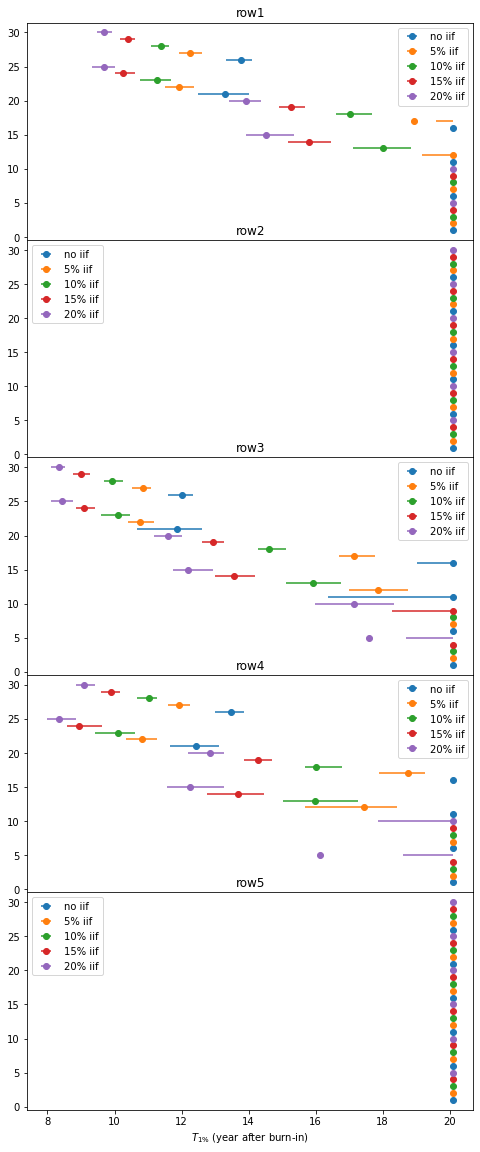

In [14]:
fig, axes = plt.subplots(5, 1, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
fig.patch.set_facecolor('white')

(ax1), (ax2), (ax3), (ax4), (ax5) = axes

t01_iif_plotter_one_ax(ax1, 'row1')
t01_iif_plotter_one_ax(ax2, 'row2')
t01_iif_plotter_one_ax(ax3, 'row3')
t01_iif_plotter_one_ax(ax4, 'row4')
t01_iif_plotter_one_ax(ax5, 'row5')

plt.show()